In [81]:
#IMPORTS

import pandas as pd
import math
from wordcloud import WordCloud
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sys,os
%run ../datuslib.ipynb

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib

sns.set(style="whitegrid") # seteando tipo de grid en seaborn
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [7]:
N_df = pd.read_csv("../Data/train.csv")

In [20]:
N_df_desastres = N_df[N_df.target == 1]

In [38]:
N_keyword_desastre = N_df_desastres.keyword.dropna()
N_keyword_desastre

31        ablaze
33        ablaze
37        ablaze
38        ablaze
46        ablaze
          ...   
7542    wreckage
7543    wreckage
7552     wrecked
7559     wrecked
7572     wrecked
Name: keyword, Length: 3229, dtype: object

In [39]:
def isKeywordInEnglish(keyword):
    keyword = str(keyword)
    englishDictionary = enchant.Dict("en_US")
    if englishDictionary.check(keyword):
        return True
    return False

N_keyword_desastre_ingles = N_keyword_desastre.map(isKeywordInEnglish)
N_keyword_desastre = N_keyword_desastre[N_keyword_desastre_ingles] #filtro las keywords que no estan en ingles

In [75]:
N_keyword_desastre.value_counts()

derailment     39
outbreak       39
wreckage       39
debris         37
typhoon        37
               ..
panicking       2
threat          2
ruin            1
blazing         1
electrocute     1
Name: keyword, Length: 179, dtype: int64

## Frecuencia de las palabras clave de los tweets con desastre

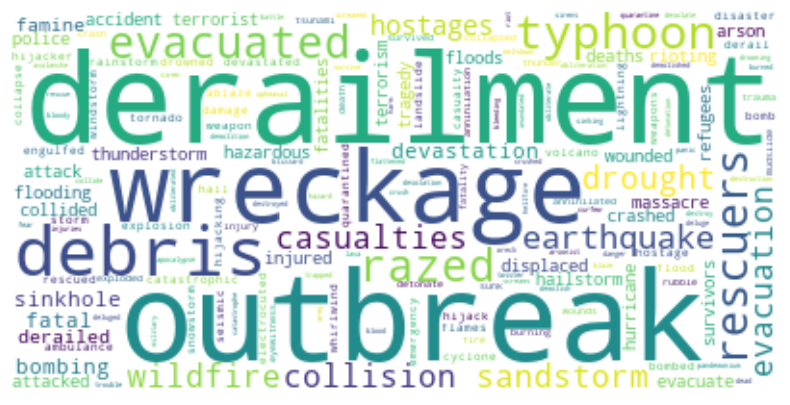

In [72]:
from stop_words import get_stop_words

freq = N_keyword_desastre.value_counts()

# Generate a word cloud image
wordcloud = WordCloud(background_color = 'white').generate_from_frequencies(freq)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=[16,5])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
